# Problem Set 3, Amol Surve


In [123]:
import IPython
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
import sklearn

---

## Introduction to the assignment

For this assignment, you will be using the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing).  Please read about the dataset carefully before continuing.  Use the following commands to load the dataset:


In [124]:
from sklearn.datasets import load_boston
bdata = load_boston()
type(bdata)

sklearn.datasets.base.Bunch

The following commands will provide some basic information about the shape of the data:

In [125]:
print(bdata.keys());
print(bdata.feature_names);
print(bdata.data.shape);
print(bdata.target.shape);
#uncomment the following if you want to see a lengthy description of the dataset
print(bdata.DESCR)

['data', 'feature_names', 'DESCR', 'target']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
(506, 13)
(506,)
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index 

---

## Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  If you're new to analyzing data in Python, please make sure to read the relevant readings linked to on Canvas before beginning (for instance, [this one](https://github.com/jrjohansson/scientific-python-lectures)).

###1.1: Histogram of housing prices

Below you will find some very basic code to make a very basic histogram of median housing prices (the "target" variable) for your dataset.  Your first task is to make this graph look pretty by doing the following:

1. Add appropriate labels to the x and y axes, make sure to include units
2. Change the bin width on the histogram to be $1000
3. Remove the axes on the top and right side of the plot window
4. Change the color of the bars to be green, and remove the black borders from the bars


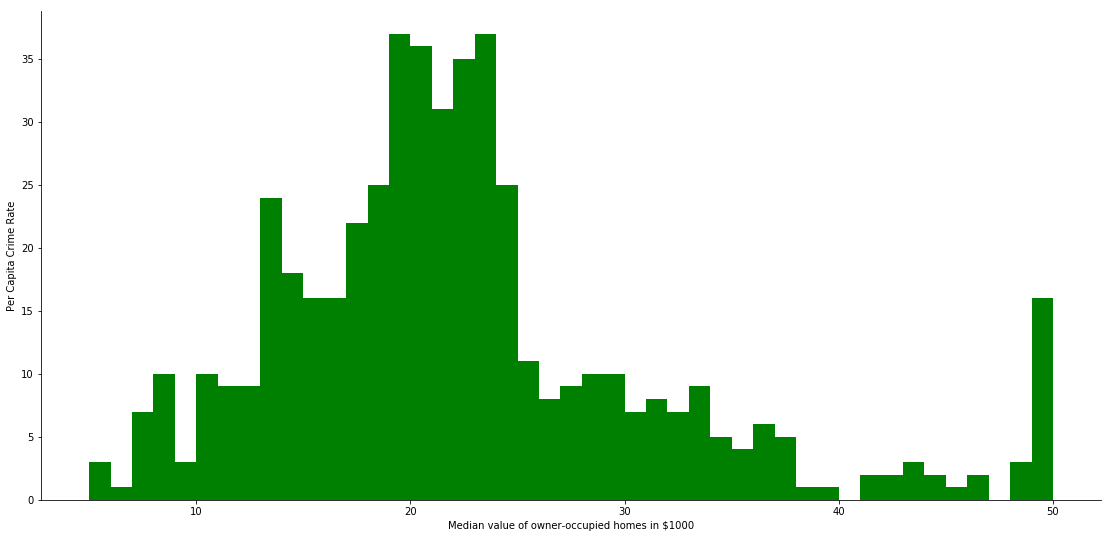

In [126]:
# prepare IPython to work with matplotlib and import the library to something convenient
%matplotlib inline  
import matplotlib.pyplot as plt  

# edit the code below to make the graph look good
fig = plt.figure(figsize=(19,9))
plt.hist(bdata.target,bins=45, color='g',edgecolor = "none")
plt.ylabel('Per Capita Crime Rate')
plt.xlabel('Median value of owner-occupied homes in $1000')
ax = fig.add_subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.tick_params(axis='both', direction='out')
ax.get_xaxis().tick_bottom()   
# remove unneeded ticks 
ax.get_yaxis().tick_left()

plt.show()

### 1.2: Scatter plot of housing prices and crime

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.


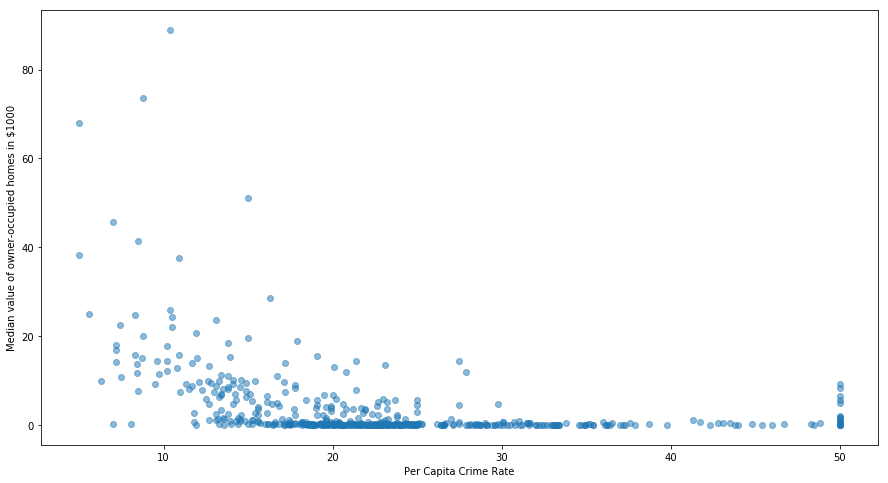

In [127]:
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
fig = plt.figure(figsize=(15,8))
#Creating scatterplot of Per Capita Crime Rate vs Median Value of owner-occupied homes in $1000
plt.scatter(df['target'], df['CRIM'],alpha=0.5)
plt.ylabel('Median value of owner-occupied homes in $1000')
plt.xlabel('Per Capita Crime Rate')

### 1.3 Create your own (creative and effective) visualization

Use another type of graph or chart to illustrate an interesting pattern in the data.  Be creative in your visualization, and make sure to produce a "publication-quality" graph.  Points will be given for useful and creative graphs; points will be deducted for confusing issues like unlabeled axes.  If you're new to data visualization, [this guide](http://pubs.aeaweb.org/doi/pdfplus/10.1257/jep.28.1.209) is a good place to start.

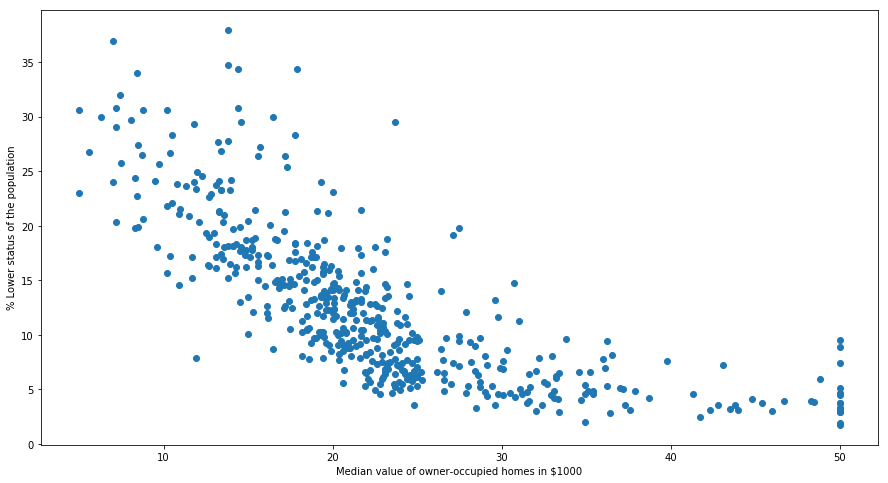

In [128]:
#Creating scatterplot of percentage of lower  vs Median Value of owner-occupied homes in $1000
fig = plt.figure(figsize=(15,8))
plt.scatter(df['target'], df['LSTAT'])
plt.xlabel('Median value of owner-occupied homes in $1000')
plt.ylabel('% Lower status of the population')

As you can see in the above scatterplot, with increase in the median value of the homes, there is decrease in the percentage of the lower status of the population.

---

## Part 2: Experimental Setup

The goal of the next few sections is to design an experiment to predict the median home value for an instance in the data.

### 2.1 Begin by writing a function to compute the Root Mean Squared Error for a list of numbers

You can find the sqrt function in the Numpy package. Furthermore the details of RMSE can be found on [Wikipedia](http://en.wikipedia.org/wiki/Root-mean-square_deviation)



In [129]:
"""
Function
--------
compute_rmse

Given two arrays, one of actual values and one of predicted values,
compute the Roote Mean Squared Error

Parameters
----------
predictions : array
    Array of numerical values corresponding to predictions for each of the N observations

yvalues : array
    Array of numerical values corresponding to the actual values for each of the N observations

Returns
-------
rmse : int
    Root Mean Squared Error of the prediction

Example
-------
>>> print compute_rmse((2,2,3),(0,2,6)
2.08
"""
def compute_rmse(predictions, yvalues):
    error_sq = (predictions - yvalues)**2
    error_sq = error_sq.sum()
    rmse = np.sqrt(error_sq/float(len(predictions)))
    return rmse

### 2.2 Divide your data into training and testing datasets

Randomly select 66% of the data and put this in a training dataset (call this "bdata_train"), and place the remaining 34% in a testing dataset (call this "bdata_test")


In [130]:
data = np.column_stack((bdata.data,bdata.target))
# split is the same "random" split used by the rest of the class
np.random.seed(seed=13579)

# Function to randomly split the data into test and train
def split(data, target, per_train):
    data = np.insert(data, data.shape[1],target, axis = 1)
    np.random.shuffle(data)
    
    train = data[0:per_train*len(target),:]
   
    
    test = data[per_train*len(target):len(target),:]
   
    return train, test, data

# Create train, test and the dataset using the random_split function
bdata_train, bdata_test, data = split(bdata.data, bdata.target, 0.66)

/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/amolsurve/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


### 2.3 Use a very bad baseline for prediction, and compute RMSE

Create a model that predicts, for every observation x_i, that the median home value is the average (mean) of the median values for all instances in the training set.  Compute the RMSE on the training set.  Now compute the RMSE on the test data set (but use the model you trained on the training set!).  How does RMSE compare for training vs. testing datasets? Is this what you expected, and why?

In [131]:
# enter your code here
# Calulate the mean value of the train dataset target
mean = np.mean(bdata_train[:,13])


# Calulcating RMSE value of test and train data
print('Training RMSE using Train data mean: ', compute_rmse(bdata_train[:,13], mean))
print('Test RMSE using Train data mean: ', compute_rmse(bdata_test[:,13], mean))


('Training RMSE using Train data mean: ', 8.5849678837755334)
('Test RMSE using Train data mean: ', 10.281671624776735)


RMSE value for test dataset calculated with respect to the mean of the train data is higher than the RMSE obtained from the train data w.r.t mean of train data. we can expect the mean error to be higher when the predicted values are mean of a different dataset. We will expect the train dataset to have a lower error. If we would've used the test mean to predict test values and then calculate the RMSE, we would've gotten a lower RMSE as the mean would more closely represent the test data than the train mean does in our case. 

---

## Part 3: Nearest Neighbors


### 3.1 Nearest Neighbors: Distance function
Let's try and build a machine learning algorithm to beat the "Average Value" baseline that you computed above.  Soon you will implement the Nearest Neighbor algorithm, but first you need to create a distance metric to measure the distance (and similarity) between two instances.  Write a generic function to compute the L-Norm distance (called the [*p*-norm](http://en.wikipedia.org/wiki/Norm_(mathematics) distance on Wikipedia). Verify that your function works by computing the Euclidean distance between the points (3,4) and (6,8).

In [146]:
"""
Function
--------
distance

Given two instances and a value for L, return the L-Norm distance between them

Parameters
----------
x1, x2 : array
    Array of numerical values corresponding to predictions for each of the N observations

L: int
    Value of L to use in computing distances

Returns
-------
dist : int
    The L-norm distance between instances

Example
-------
>>> print distance((3,4),(6,8),2)
5

"""
def distance(x1, x2, L):
    tempsum=0;
    diffx=x2[0]-x1[0];
    diffy=x2[1]-x1[1];
    sqsum=diffx**L+diffy**L;          
    
    return np.power(sqsum,1/L);

       
print(distance((3,4),(6,8),2))

1


In [147]:
def distance(x1, x2, L):
    
    dist = x1-x2
    sqsum = dist**L
    final = sqsum.sum(axis = 1)
   
    return np.array(pow(final,1/float(L)))


### 3.2 Basic Nearest Neighbor algorithm

Now things get fun.  Your task is to implement a basic nearest neighbor algorithm from scratch.  Your simple model will use two input features (CRIM and RM) and a single output (MEDV).  In other words, you are modelling the relationship between median home value and crime rates and house size.

Use your training data (bdata_train) to "fit" your model, although as you know, with Nearest Neighbors there is no real training, you just need to keep your training data in memory.  Write a function that predicts, for each instance in the testing data (bdata_test), the median home value using the nearest neighbor algorithm we discussed in class.  Since this is a small dataset, you can simply compare your test instance to every instance in the training set, and return the MEDV value of the closest training instance.  Have your function take L as an input, where L is passed to the distance function.

Compute the RMSE for the Nearest Neighbor predictions on the test set, using the Euclidean distance.  Report an estimate of the total time taken by your code to predict the nearest neighbors for all the values in the test data set.

In [134]:
import time
def neighbor(train, test, col_num, target, L, k=1):
    start_time = time.time()
    final = []
    for i in range(len(test)):
        #using the distance function to calculate the distance between test & train instances
        dist = distance(train[:,col_num], test[i,col_num], L)        
        dist = dist[:, np.newaxis]
        dist2 = np.append(dist, train[:,target],1)
        #sorting to get the minimum distances first
        sortd = dist2[np.argsort(dist2[:,0]),:][0]  
        final.append(sortd)
    #apppending to the final result
    final2 = np.array(final)
    final2 = np.append(final2, test[:, target], axis = 1)
    #computing the root mean square error
    rmse = compute_rmse(final2[:,1], final2[:,2])
    print('Total Time Taken is ' + str(time.time() - start_time))
    return rmse

print(neighbor(bdata_train, bdata_test,[0,5],[13],2))


Time Taken is : 0.012274980545
7.45009989459


### 3.3 Results and Normalization

If you were being astute, you would have noticed that we never normalized our features -- a big no-no with Nearest Neighbor algorithms.  Write a generic normalization function that takes as input an array of values for a given feature, and returns the normalized array (subtract the mean and divide by the standard deviation).

Re-run the Nearest Neighbor algorithm on the normalized dataset (still just using CRIM and RM as input), and compare the RMSE from this method with your previous RMSE evaluations.

*NOTE*: To normalize properly, best practice is to compute the mean and standard deviation on the training set, and use these values to normalize the testing dataset. However, for this problem set, it is okay if you separately normalize each dataset using the respective mean and standard deviation.

In [135]:
"""
# write your function specification here!
"""
def normalize(raw_data, mn, stddev):
    #your code here
    normalized_data = (raw_data-mn)/float(stddev)
    return normalized_data

def normalize2(raw_data):
    normalized_data = (raw_data-np.mean(raw_data))/float(np.std(raw_data))
    return normalized_data
test = np.vstack((normalize2(bdata_test[:,0]),normalize2(bdata_test[:,5]),(bdata_test[:,13]))).T
train = np.vstack((normalize2(bdata_train[:,0]),normalize2(bdata_train[:,5]),(bdata_train[:,13]))).T
z = neighbor(train, test, [0,1], [2], 2)
print('RMSE on normalized input based on nearest neighbors algorithm: ', z)

Time Taken is : 0.032940864563
('RMSE using normalized input based on nearest neighborsn algorithm: ', 7.7343726462599331)


We can see that we obtain a much lower RMSE when we use Normalized inputs of the data. This is because the nearest neighbors algorithm works best when all the scales of the predictor variables are the same. This is because while calulcation the distance we can obtain a better final distance when we have same scaled variables.

### 3.4 Optimization

A lot of the decisions we've made so far have been arbitrary.  Try to increase the performance of your nearest neighbor algorithm by adding features that you think might be relevant, and by using different values of L in the distance function.  Try a model that uses a different set of 2 features, then try at least one model that uses more than 4 features, then try using a different value of L.  If you're having fun, try a few different combinations of features and L!

What combination of features and distance function provide the lowest RMSE?  Do your decisions affect the running time of the algorithm?

In [149]:
test3 = np.vstack((normalize(bdata_test[:,12], np.mean(bdata_test[:,12]), np.std(bdata_test[:,12])), 
                  normalize(bdata_test[:,9], np.mean(bdata_test[:,9]), np.std(bdata_test[:,9])), 
                  (bdata_test[:,13]))).T

train3 = np.vstack((normalize(bdata_train[:,12], np.mean(bdata_train[:,12]), np.std(bdata_train[:,12])), 
                   normalize(bdata_train[:,9], np.mean(bdata_train[:,9]), np.std(bdata_train[:,9])), 
                   (bdata_train[:,13]))).T

print 'With L = 2 and LSAT and AGE as varaibles ' + str(neighbor(train3, test3, [0,1], [2], 2))
print 'With L = 4 and LSAT and AGE as varaibles ' + str(neighbor(train3, test3, [0,1], [2], 4))
print 'With L = 6 and LSAT and AGE as varaibles ' + str(neighbor(train3, test3, [0,1], [2], 6))
print 'With L = 8 and LSAT and AGE as varaibles ' + str(neighbor(train3, test3, [0,1], [2], 8))



Time Taken is : 0.0165450572968
With L = 2 and LSAT and AGE as varaibles 7.59468554681
Time Taken is : 0.0184001922607
With L = 4 and LSAT and AGE as varaibles 7.41175835074
Time Taken is : 0.0318911075592
With L = 6 and LSAT and AGE as varaibles 7.40256946486
Time Taken is : 0.0228190422058
With L = 8 and LSAT and AGE as varaibles 7.40457209171


### 3.5 Cross-Validation

The more you tinkered with your features and distance function, the higher the risk that you overfit your training data.  To prevent this sort of overfitting, you need to use cross-validation (see K-fold [cross-validation](http://en.wikipedia.org/wiki/Cross-validation_(statistics)).  Here you must implement a simple k-fold cross-validation algorithm yourself.  The function you write here will be used several more times in this problem set, so do your best to write efficient code! (Note that the sklearn package has a built-in [K-fold](http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation) iterator -- you should *not* be invoking that or any related algorithms in this section of the problem set.)

Use 10-fold cross-validation and report the average RMSE for Nearest Neighbors using Euclidean distance with CRIM and RM input features, as well as the total running time for the full run of 10 folds.  In other words, randomly divide your dataset into 10 equally-sized samples, and for each of 10 iterations (the "folds"), use 9 samples as "training data" (even though there is no training in k-NN!), and the remaining 1 sample for testing.  Compute the RMSE of that particular test set, then move on to the next iteration.  Report the average RMSE across the 10 iterations.

In [142]:
#getting indices of k-fold data
def partition(l, n):
    for i in range(0, len(l), n):
        yield l[i:i+n]

# performing K-fold cross validation 
def kfoldcv(data, K, func, L, column, target, k=1):
    start_time = time.time()
    
    # Creating windows each with indices
    window = list(partition(range(len(data)),int(len(data)/K)))
    
    # considering only k windows
    if len(window) > K:
        window[K-1] = window[K-1] + window[K]
        window.remove(window[K])
     
    rmse = []
    
    # splitting train and test using 'k-1' folds for train and 1 fold for test
    for i in range(K):
        testKF = window[i]
        trainKF = range(len(data))
        trainKF = [elem for elem in trainKF if elem not in testKF]
        
        train = data[trainKF,:]
        test = data[testKF,:]
        
        # RMSE of every k fold 
        rmse.append(func(train, test, column, target, L, k))
        
        # average RMSE for whole k-fold CV
        print('Average RMSE is ', str(np.mean(rmse)))
    
    # Total time taken
    print ('Total Time taken for CV ', str(time.time()-start_time))
    
    # mean of the all the RMSE of the K-fold CV
    return np.mean(rmse)
    


# Normalizing data
normalData = np.vstack((normalize2(bdata.data[:,0]),
                    normalize2(bdata.data[:,5]),
                    (bdata.target))).T

# passing normalized data through K-fold cross validation and using the 'neighbor' function
print 'Output of 10-fold cross validation using CRIM and RM: \n'
print kfoldcv(normalData, 10, neighbor,2,[0,1], [2], 3)

Output of 10-fold cross validation using CRIM and RM: 

Time Taken is : 0.00673985481262
('Average RMSE is ', '4.88127032646')
Time Taken is : 0.00628185272217
('Average RMSE is ', '4.61842073578')
Time Taken is : 0.0123729705811
('Average RMSE is ', '4.58424889881')
Time Taken is : 0.00962805747986
('Average RMSE is ', '4.91142715006')
Time Taken is : 0.00784397125244
('Average RMSE is ', '4.96893016007')
Time Taken is : 0.00775694847107
('Average RMSE is ', '4.9452901702')
Time Taken is : 0.00401592254639
('Average RMSE is ', '4.97887805868')
Time Taken is : 0.00398993492126
('Average RMSE is ', '5.89410468103')
Time Taken is : 0.00355792045593
('Average RMSE is ', '6.2767368467')
Time Taken is : 0.00373101234436
('Average RMSE is ', '6.94231763925')
('Total Time taken for CV ', '0.0824341773987')
6.94231763925


### 3.6 K-Nearest Neighbors Algorithm

Implement the K-Nearest Neighbors algorithm.  Using 10-fold cross validation, report the RMSE for K=3 and the running time of the algorithm.

In [138]:
"""
Function
--------
knn
    Given test and train data along with other values, this function predicts the 'target' based on the average of the 
    K nearest neighbors from the training set.

Parameters
----------
train, test : arrays
    Multi-dimensional arrays

col_num, target : array
    1D arrays specifying the predictors and the target columns in test and train data

L, K : integers
    L = value of the L in L-norm distance
    K = value of the k in k-nearest neighbors

Returns
-------
rmse : int
    The RMSE value between predicted and original target value based on k nearest neighbors 

Example
-------
>>> print knn(bdata_train, bdata_test,[0,5],[13],2, 3)
Time Taken is : 0.0110039710999
7.45009989459
"""

def knn(train, test, col_num, target, L, K):
    start_time = time.time()
    result = []
    for j in range(len(test)):
        #using the distance function to calculate the distance between test & train instances
        dist1 = distance(train[:,col_num], test[j,col_num], L)        
        dist1 = dist1[:, np.newaxis]
        dist2 = np.append(dist1, train[:,target],1)
        #sorting to get the minimum distances first
        sortd = dist2[np.argsort(dist2[:,0]),:]
        #apppending to the final result
        result.append(np.mean(sortd[0:K], axis = 0))
   
    result = np.array(result)
    resultMain = np.append(result, test[:,target],1)
    #finding root mean square error
    rmse = compute_rmse(resultMain[:,1], resultMain[:,2])

    return rmse

print("RMSE of non-normalized data of predictor variables of RM and CRIM \n")
print(knn(bdata_train, bdata_test, [0,5], [13], 2, 3)) 

RMSE of non-normalized data of predictor variables of RM and CRIM 

6.70820345379


### 3.7 Using cross validation to find K

What is the best choice of K?  Compute the RMSE for values of K between 1 and 25 using 10-fold cross-validation.  Use the following features in your model, and don't forget to normalize: CRIM, ZN, RM, AGE, DIS, TAX.  Create a graph that shows how RMSE changes as K increases from 1 to 25.  Label your axes, and summarize what you see.  What do you think is a reasonable choice of K for this model?

In [139]:
#computing rmse for k values between 1 to 25
rmse = []
temp = 100

for i in range(25):
    rmse.append(kfoldcv(norm_data, 10, knn, 2, [0,1,5,6,7,9], [13], i+1))
    if temp > rmse[i]:
        temp = rmse[i]
        count = i+1


print 'The best value of K for KNN classifier for this data is :', str(count)

('Average RMSE is ', '4.42590103821')
('Average RMSE is ', '3.7276617127')
('Average RMSE is ', '4.18880966032')
('Average RMSE is ', '5.05573237176')
('Average RMSE is ', '4.82691575112')
('Average RMSE is ', '4.96346350318')
('Average RMSE is ', '4.74721095111')
('Average RMSE is ', '5.89065298334')
('Average RMSE is ', '5.92955834415')
('Average RMSE is ', '6.07447106171')
('Total Time taken for CV ', '0.13422203064')
('Average RMSE is ', '4.02971463009')
('Average RMSE is ', '3.42843433806')
('Average RMSE is ', '3.77400754961')
('Average RMSE is ', '4.63358549267')
('Average RMSE is ', '4.31363193951')
('Average RMSE is ', '4.37580893804')
('Average RMSE is ', '4.25972406697')
('Average RMSE is ', '5.46257035515')
('Average RMSE is ', '5.58957868379')
('Average RMSE is ', '5.7109109321')
('Total Time taken for CV ', '0.183096170425')
('Average RMSE is ', '4.03652766069')
('Average RMSE is ', '3.32169733033')
('Average RMSE is ', '3.4968257498')
('Average RMSE is ', '4.46532113304'

We obtained the best RMSE at k = 5 using the normalized variables CRIM, ZN, RM, AGE, DIS, TAX. 

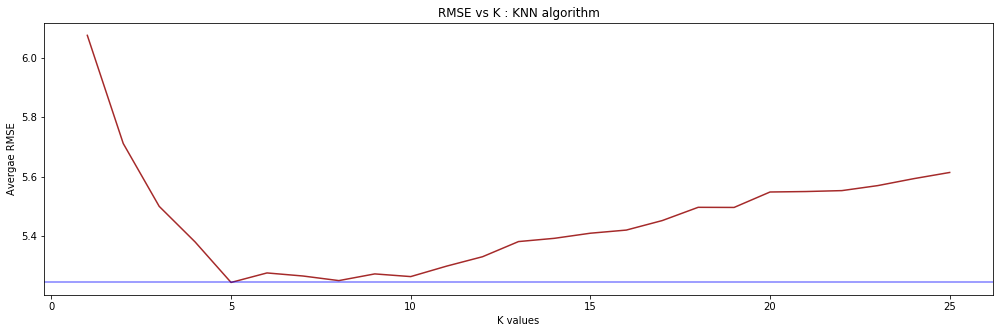

In [140]:
# Creating k values
lst= range(0,26)
lst.remove(0)

# Plotting average RMSE v/s K
plt.figure(figsize=(17,5))
plot = plt.plot( lst,rmse, color = 'brown')
plt.axhline(y = min(rmse), c = 'b', alpha = 0.5)
plt.title('RMSE vs K : KNN algorithm')
plt.xlabel('K values')
plt.ylabel('Avergae RMSE')
plt.show()